In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import time

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy import Column, Integer, String, Float, and_, Date, desc, func

import os


In [5]:
#create a engine using the hawaii.sqlite 

engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
#save references to each table
# Save references to table for measurement
measurement = Base.classes.measurement

measurement.__table__.columns.values()


[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [9]:
#display the first row of column headers for measurement 
measurement_data = pd.read_sql("Select * From measurement", engine)
measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [10]:
# Save references to table for  station table
station = Base.classes.station

station.__table__.columns.values()


[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [11]:
#display the first row of column headers for station
station_data = pd.read_sql("Select * From station", engine)
station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
#need to join tables 
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

# Exploratory Climate Analysis

In [15]:
#import datetime for date fields
import datetime as dt

# Design a query to retrieve the last 12 months of precipitation data and plot the results
date_input = input('Input start date for your trip in YYYY-MM-DD format: ')
year, month, day = map(int, date_input.split('-'))
start = dt.date(year, month, day)

date_input = input('Input End date for your trip in YYYY-MM-DD format: ')
year, month, day = map(int, date_input.split('-'))
end = dt.date(year, month, day)


Input start date for your trip in YYYY-MM-DD format: 2015-07-08
Input End date for your trip in YYYY-MM-DD format: 2015-07-18


In [16]:
# Calculate the date 1 year ago from the last data point in the database
last_year = end - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
prcp_year = session.query(measurement.date,measurement.prcp).filter(and_(measurement.date<=end, measurement.date>=last_year)).all()

prcp_year



[('2014-07-18', 0.05),
 ('2014-07-19', 0.0),
 ('2014-07-20', 1.09),
 ('2014-07-21', 0.0),
 ('2014-07-22', 0.0),
 ('2014-07-23', 0.01),
 ('2014-07-24', 0.0),
 ('2014-07-25', 0.0),
 ('2014-07-26', 0.0),
 ('2014-07-27', 0.79),
 ('2014-07-28', 0.0),
 ('2014-07-29', 0.0),
 ('2014-07-30', 0.0),
 ('2014-07-31', 0.0),
 ('2014-08-01', 0.0),
 ('2014-08-02', 0.0),
 ('2014-08-03', 0.0),
 ('2014-08-04', 0.0),
 ('2014-08-05', 0.0),
 ('2014-08-06', 0.01),
 ('2014-08-07', 0.15),
 ('2014-08-08', None),
 ('2014-08-09', None),
 ('2014-08-10', 0.0),
 ('2014-08-11', 0.0),
 ('2014-08-12', 0.0),
 ('2014-08-13', 0.0),
 ('2014-08-14', 0.06),
 ('2014-08-15', 0.0),
 ('2014-08-16', 0.0),
 ('2014-08-17', 0.0),
 ('2014-08-18', 0.0),
 ('2014-08-19', 0.0),
 ('2014-08-20', 0.0),
 ('2014-08-21', 0.0),
 ('2014-08-22', 0.0),
 ('2014-08-23', 0.0),
 ('2014-08-24', 0.08),
 ('2014-08-25', 0.01),
 ('2014-08-26', 0.05),
 ('2014-08-27', 0.01),
 ('2014-08-28', 0.01),
 ('2014-08-29', 0.0),
 ('2014-08-30', 0.0),
 ('2014-08-31', 0.

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_year, columns=["date", "precipitation"])

# Sort the dataframe by date
prcp_df.set_index('date', inplace=True)
prcp_df.head(20)

,precipitation
date,
2014-07-18,0.05
2014-07-19,0.00
2014-07-20,1.09
2014-07-21,0.00
2014-07-22,0.00
2014-07-23,0.01
2014-07-24,0.00
2014-07-25,0.00
2014-07-26,0.00


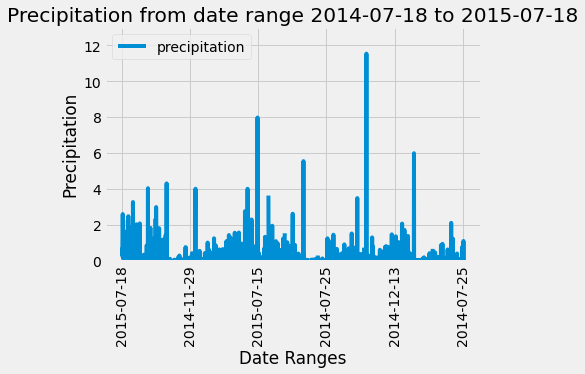

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.iloc[::-1].plot()
plt.xticks(rotation=90)
plt.ylim(0, 13)
plt.title("Precipitation from date range %s to %s" % (last_year, end))
plt.xlabel("Date Ranges")
plt.ylabel("Precipitation")
plt.show()


In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()


,precipitation
count,2304.000000
mean,0.156597
std,0.505496
min,0.000000
25%,0.000000
50%,0.010000
75%,0.090000
max,11.530000


In [20]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(station.station).count()
print("The number of stations is: %s" % station_count)

The number of stations is: 9


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?

active_stations = session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station)
active_stations


In [22]:
# List the stations and the counts in descending order.act

desc_active_stations= active_stations.order_by(func.count(measurement.date)).all()

desc_active_stations

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [23]:
 #Which station has the highest number of observations?
# Choose the station with the highest number of temperature observations.
high_activity = active_stations[0][0]
amountof_observations = active_stations[0][1]

print(f"The most active station is {high_activity} with a total of {amountof_observations} observations.")


The most active station is USC00511918 with a total of 1979 observations.


In [24]:
# Query the last 12 months of temperature observation data for this station
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
highactivestation_yrtemp = session.query(measurement.date, measurement.tobs).filter(and_(measurement.date<=end, measurement.date>=last_year),measurement.station ==high_activity).all()
highactivestation_yrtemp

[('2014-07-18', 74.0),
 ('2014-07-19', 83.0),
 ('2014-07-20', 74.0),
 ('2014-07-21', 73.0),
 ('2014-07-22', 74.0),
 ('2014-07-23', 75.0),
 ('2014-07-24', 74.0),
 ('2014-07-25', 76.0),
 ('2014-07-26', 82.0),
 ('2014-07-27', 75.0),
 ('2014-07-28', 73.0),
 ('2014-07-29', 70.0),
 ('2014-07-30', 74.0),
 ('2014-07-31', 83.0),
 ('2014-08-01', 75.0),
 ('2014-08-02', 81.0),
 ('2014-08-03', 83.0),
 ('2014-08-04', 83.0),
 ('2014-08-05', 76.0),
 ('2014-08-06', 73.0),
 ('2014-08-07', 81.0),
 ('2014-08-08', 79.0),
 ('2014-08-09', 74.0),
 ('2014-08-10', 82.0),
 ('2014-08-11', 69.0),
 ('2014-08-12', 70.0),
 ('2014-08-13', 71.0),
 ('2014-08-14', 71.0),
 ('2014-08-15', 70.0),
 ('2014-08-16', 83.0),
 ('2014-08-17', 80.0),
 ('2014-08-18', 70.0),
 ('2014-08-19', 70.0),
 ('2014-08-20', 69.0),
 ('2014-08-21', 69.0),
 ('2014-08-22', 73.0),
 ('2014-08-24', 81.0),
 ('2014-08-25', 73.0),
 ('2014-08-26', 71.0),
 ('2014-08-27', 68.0),
 ('2014-08-28', 67.0),
 ('2014-08-29', 80.0),
 ('2014-08-30', 80.0),
 ('2014-08-

In [25]:
#create dataframe from active station temp data
highactivestation_yrtemp_df = pd.DataFrame(highactivestation_yrtemp, columns = ["date", "temperature"])
highactivestation_yrtemp_df.set_index('date', inplace=True)
highactivestation_yrtemp_df.head(10)

,temperature
date,
2014-07-18,74.0
2014-07-19,83.0
2014-07-20,74.0
2014-07-21,73.0
2014-07-22,74.0
2014-07-23,75.0
2014-07-24,74.0
2014-07-25,76.0
2014-07-26,82.0


In [26]:
#Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
highactivestation_yrtemp_df.describe()



,temperature
count,301.000000
mean,71.863787
std,5.712972
min,56.000000
25%,68.000000
50%,72.000000
75%,75.000000
max,85.000000


In [27]:
starttemp_data = session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).filter(measurement.date >= start).all()
starttemp_data 

[(56.0, 74.72430098684211, 87.0)]

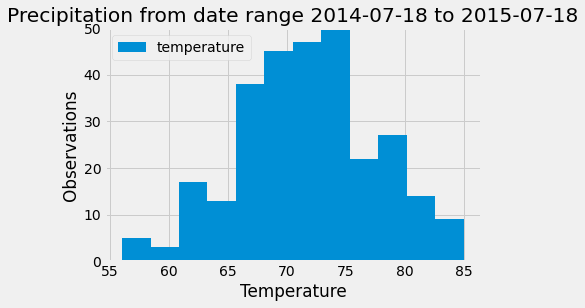

In [28]:
#Plot the results as a histogram with `bins=12`
highactivestation_yrtemp_df.iloc[::-1].plot.hist(bins=12)

plt.ylim(0, 50)
plt.title("Precipitation from date range %s to %s" % (last_year, end))
plt.xlabel("Temperature")
plt.ylabel("Observations")
plt.show()



FLASK Section


In [29]:
from flask import Flask, jsonify


In [30]:
# Flask Setup
app = Flask(__name__)

In [31]:
# Define homepage
@app.route("/")
def homepage():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations <br/>"
        f"/api/v1.0/tobs <br/>"
        f"/api/v1.0/<start> <br/>"
        f"/api/v1.0/<start>/<end>"
    )

In [32]:
# preciptiation route
#Convert the query results to a dictionary using `date` as the key and `prcp` as the value.
@app.route("/api/v1.0/precipitation")
def precipitationdata():
    """Return a list of precipitation by date"""
    
    results = session.query(measurement.prcp, measurement.date).all()

    # close the session to end the communication with the database
    #session.close()

    #Return the JSON representation of your dictionary.
    prcp_results = {val:key for (key,val) in results}

    # print(prcp_results)
    return jsonify(prcp_results)

In [43]:
#Return a JSON list of stations from the dataset.@app.route("/api/v1.0/stations")
@app.route('/api/v1.0/stations')
def stationdata():
    """Return a list of all stations"""
    
    results = session.query(station.station).all()
    #print(results)
    
    station_results = list(np.ravel(results))
    #print(station_results)
    return jsonify(station_results)

AssertionError: View function mapping is overwriting an existing endpoint function: stationdata

In [44]:
#Query the dates and temperature observations of the most active station for the last year of data.
#Return a JSON list of temperature observations (TOBS) for the previous year.
@app.route("/api/v1.0/tobs")
def active_station():
    """Return information of most active station"""
    active_stations2 = session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station)
    high_activity2 = active_stations2[0][0]
    amountof_observations2 = active_stations2[0][1]
    highactivestation_yrtemp2 = session.query(measurement.date, measurement.tobs).filter(and_(measurement.date<=end, measurement.date>=last_year),measurement.station ==high_activity2).all()
    act_results2 = list(np.ravel(highactivestation_yrtemp2))
    return jsonify(act_results2)


AssertionError: View function mapping is overwriting an existing endpoint function: active_station

In [41]:
#start route
#Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
#When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.
@app.route("/api/v1.0/<start>")
def start_date():    
    start = dt.date(2015, 7, 8)
    starttemp_data = session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).filter(measurement.date >= start).all()
    
    return jsonify(starttemp_data)

AssertionError: View function mapping is overwriting an existing endpoint function: start_date

In [42]:
#start and end route
#When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.
@app.route("/api/v1.0/<start>/<end>")
def range_date():
    start = dt.date(2015, 7, 8)
    end = dt.date(2015, 7, 18)
    stendtemp_data = session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).filter(and_(measurement.date >= start, measurement.date <= end)).all()
    
    return jsonify(stendtemp_data)

AssertionError: View function mapping is overwriting an existing endpoint function: range_date

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
